<a href="https://colab.research.google.com/github/ShiyuGong/shiyugong.github.io/blob/master/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


In this colab notebook, we try to use different classification models for digit recognition and to see which model has the best performance.

## Ingest Digits Dataset

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
import seaborn as sns

digits = datasets.load_digits()

## EDA

In [0]:
digits.data.shape

(1797, 64)

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images.

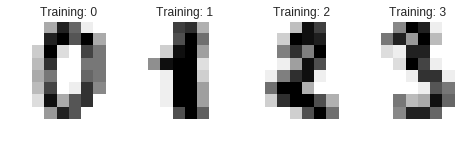

In [0]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## Model

The data set, digits, contains an already structured and labeled set of samples that contains pixel information for numbers up to 9 that we can use for training and testing.

In [0]:
# 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size =0.2, random_state=1)

The countplot is made to check whether the training dataset is biased or not towards certain numbers. According to the result, it seems the distribution of the number of digits within the training dataset seems to be even.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


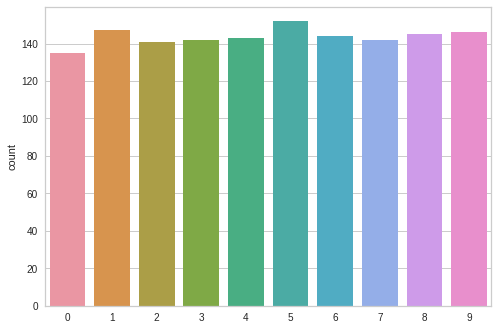

In [0]:
sns.countplot(y_train)

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
LogisticRegr = LogisticRegression()

LogisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Evaluation Logistic Regression Performance

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

   micro avg       0.97      0.97      0.97       360
   macro avg       0.97      0.97      0.97     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


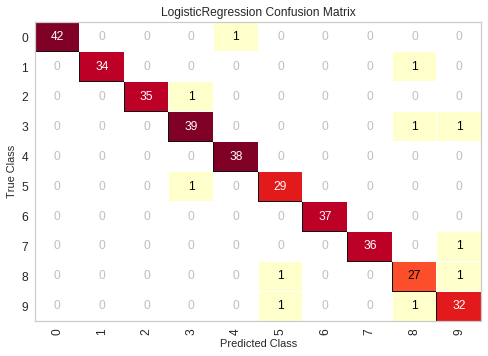

In [0]:
y_pred_LogisticRegr=LogisticRegr.predict(X_test)
metrics.classification_report(y_test, y_pred_LogisticRegr)

print("Classification report for classifier %s:\n%s\n"
      % (LogisticRegr, metrics.classification_report(y_test, y_pred_LogisticRegr)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_LogisticRegr))

from yellowbrick.classifier import ConfusionMatrix
cm_LogisticRegr = ConfusionMatrix(LogisticRegr, classes=[0,1,2,3,4,5,6,7,8,9])

cm_LogisticRegr.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm_LogisticRegr.score(X_test, y_test)


cm_LogisticRegr.poof()

In [0]:
from sklearn.metrics import accuracy_score
model_acc = LogisticRegr.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred_LogisticRegr)

print('\nRandom Forest Trained Classifier Accuracy: ', model_acc)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)


Random Forest Trained Classifier Accuracy:  0.9694444444444444

Accuracy of Classifier on Validation Images:  0.9694444444444444


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Evaluation Random Forest Performance

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.95      0.97        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.93      0.97      0.95        29

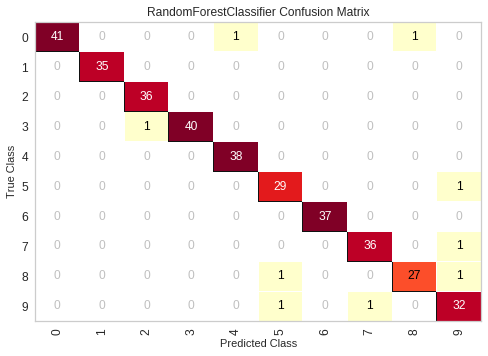

In [0]:
y_pred_rf=rf.predict(X_test)
metrics.classification_report(y_test, y_pred_rf)

print("Classification report for classifier %s:\n%s\n"
      % (rf, metrics.classification_report(y_test, y_pred_rf)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_rf))

from yellowbrick.classifier import ConfusionMatrix
cm_rf = ConfusionMatrix(rf, classes=[0,1,2,3,4,5,6,7,8,9])

cm_rf.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm_rf.score(X_test, y_test)


cm_rf.poof()

In [0]:
model_acc = rf.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred_rf)

print('\nRandom Forest Trained Classifier Accuracy: ', model_acc)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)


Random Forest Trained Classifier Accuracy:  0.975

Accuracy of Classifier on Validation Images:  0.9805555555555555


### Support Vector Machine (SVM)

In [0]:
svm = svm.SVC(gamma=0.001, kernel='poly', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

#### Evaluation SVM Performance

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.92      0.97      0.94        34

   micro avg       0.99      0.99      0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99   

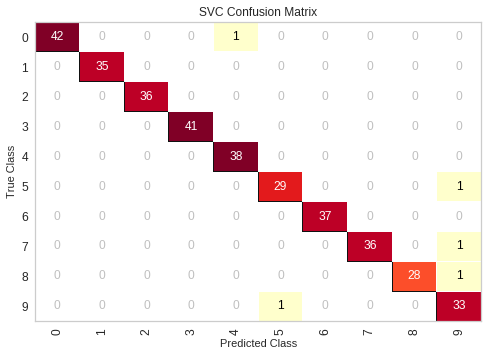

In [0]:
y_pred_svm=svm.predict(X_test)
metrics.classification_report(y_test, y_pred_svm)

print("Classification report for classifier %s:\n%s\n"
      % (svm, metrics.classification_report(y_test, y_pred_svm)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred_rf))

from yellowbrick.classifier import ConfusionMatrix
cm_svm = ConfusionMatrix(svm, classes=[0,1,2,3,4,5,6,7,8,9])

cm_svm.fit(X_train, y_train)

cm_svm.score(X_test, y_test)

cm_svm.poof()

In [0]:
model_acc = svm.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred_svm)

print('\nRandom Forest Trained Classifier Accuracy: ', model_acc)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)


Random Forest Trained Classifier Accuracy:  0.9861111111111112

Accuracy of Classifier on Validation Images:  0.9861111111111112


## Conclusions

*   We used three models to conduct digit recognition in this colab. According to the results, Support Vector Machine (0.99) is more accurate in predicting digit than Logistic Regression (0.97) and Random Forest(0.98).
*   Classification_report, confusion matrix are used to evaluate the performance of each model.
*   Based on the confusion matrix, we can notice that for logistic regression model there are only 5 digits without misclassification. When it comes to Random Forest and SVM, there are 7 digits with misclassification. Except for the accuracy rate, confusion matrix could provide more detailed information for us about how well the model performs for each class.
*   Overall, SVM performs well with clear margin of separation and is effective in high dimensional spaces. However, the required training time for SVM is much higher than other models, so we should be careful if the dataset is large. 
*   For the next step, a convolutional neural network (CNN), a class of deep neural networks, most commonly applied to analyzing visual imagery. is worthwhile to try to realize higher performance.






